In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data/DOM/Load Actuals/Processed/Aggregated/load.csv', parse_dates=['DATE'])
df.rename(columns={'DATE': 'ds','MW':'y'},inplace=True)

In [4]:
m = Prophet()
m.fit(df)

In [11]:
future = m.make_future_dataframe(periods=168, freq='H')
future.tail()

,ds
87811,2020-01-07 19:00:00
87812,2020-01-07 20:00:00
87813,2020-01-07 21:00:00
87814,2020-01-07 22:00:00
87815,2020-01-07 23:00:00


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87811,2020-01-07 19:00:00,14593.419901,12552.351994,16610.864564
87812,2020-01-07 20:00:00,14281.930157,12232.675841,16282.465370
87813,2020-01-07 21:00:00,13699.458196,11496.932848,15884.272669
87814,2020-01-07 22:00:00,12970.495313,10927.300315,14932.187701
87815,2020-01-07 23:00:00,12247.548848,10144.243849,14279.993819


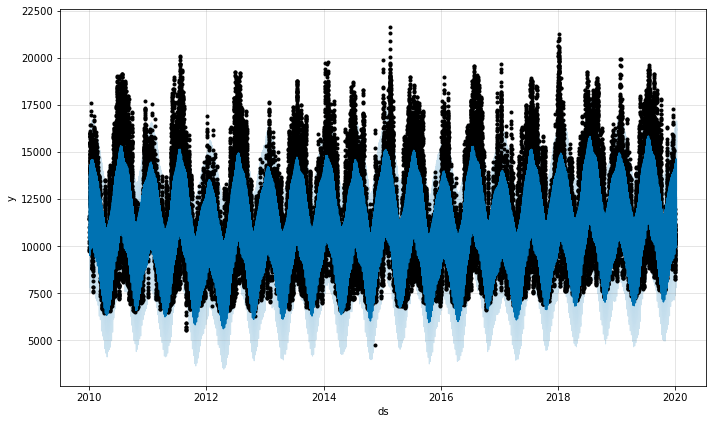

In [13]:
fig1 = m.plot(forecast)

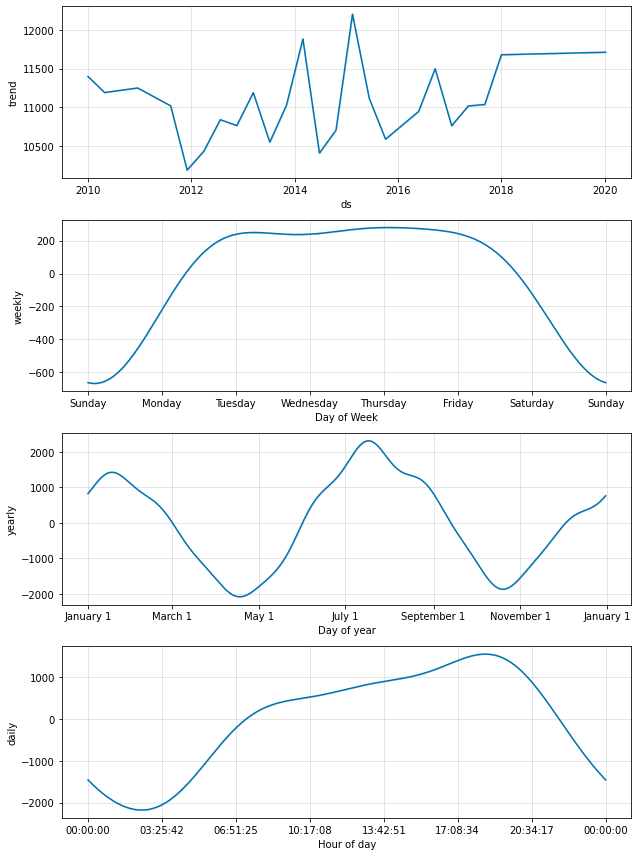

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01 00:00:00,11399.444511,8907.526648,12987.774269,11399.444511,11399.444511,-400.198682,-400.198682,-400.198682,-1455.413296,...,243.673469,243.673469,243.673469,811.541146,811.541146,811.541146,0.0,0.0,0.0,10999.245829
1,2010-01-01 01:00:00,11399.369996,8471.223794,12407.602129,11399.369996,11399.369996,-849.701308,-849.701308,-849.701308,-1902.243087,...,238.949920,238.949920,238.949920,813.591859,813.591859,813.591859,0.0,0.0,0.0,10549.668688
2,2010-01-01 02:00:00,11399.295481,8198.654021,12333.863969,11399.295481,11399.295481,-1097.818073,-1097.818073,-1097.818073,-2147.110593,...,233.647132,233.647132,233.647132,815.645388,815.645388,815.645388,0.0,0.0,0.0,10301.477409
3,2010-01-01 03:00:00,11399.220967,8025.263308,12252.913672,11399.220967,11399.220967,-1096.731159,-1096.731159,-1096.731159,-2142.139350,...,227.706491,227.706491,227.706491,817.701700,817.701700,817.701700,0.0,0.0,0.0,10302.489808
4,2010-01-01 04:00:00,11399.146452,8498.585374,12746.614650,11399.146452,11399.146452,-814.775482,-814.775482,-814.775482,-1855.605003,...,221.068762,221.068762,221.068762,819.760760,819.760760,819.760760,0.0,0.0,0.0,10584.370970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87811,2020-01-07 19:00:00,11713.305726,12552.351994,16610.864564,11713.305726,11713.305726,2880.114175,2880.114175,2880.114175,1511.976214,...,237.533944,237.533944,237.533944,1130.604018,1130.604018,1130.604018,0.0,0.0,0.0,14593.419901
87812,2020-01-07 20:00:00,11713.307558,12232.675841,16282.465370,11713.307558,11713.307558,2568.622599,2568.622599,2568.622599,1198.595724,...,237.413976,237.413976,237.413976,1132.612899,1132.612899,1132.612899,0.0,0.0,0.0,14281.930157
87813,2020-01-07 21:00:00,11713.309389,11496.932848,15884.272669,11713.309389,11713.309389,1986.148807,1986.148807,1986.148807,613.966068,...,237.564649,237.564649,237.564649,1134.618090,1134.618090,1134.618090,0.0,0.0,0.0,13699.458196
87814,2020-01-07 22:00:00,11713.311220,10927.300315,14932.187701,11713.311220,11713.311220,1257.184092,1257.184092,1257.184092,-117.425122,...,237.989670,237.989670,237.989670,1136.619544,1136.619544,1136.619544,0.0,0.0,0.0,12970.495313


In [31]:
import datetime

start_date_mask = df['ds'].dt.date >= datetime.date(2019, 1, 1)
end_date_mask = df['ds'].dt.date < datetime.date(2019, 3, 8)
df_subset = df[start_date_mask & end_date_mask]

def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

train, test = train_test_split(df_subset, 168)

In [33]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=168, freq='H')

In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1579,2019-03-07 19:00:00,12538.358779,10628.092178,14419.899851
1580,2019-03-07 20:00:00,12265.481573,10314.277589,14251.625215
1581,2019-03-07 21:00:00,11717.766822,9771.839777,13749.901131
1582,2019-03-07 22:00:00,11159.961385,9214.663637,13141.821119
1583,2019-03-07 23:00:00,10751.269970,8766.837371,12742.080730


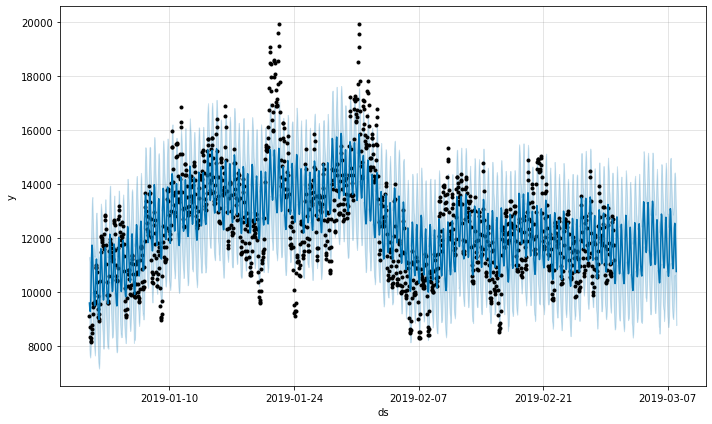

In [36]:
fig3 = m.plot(forecast)

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,9878.365377,7872.648002,11295.508775,9878.365377,9878.365377,-294.144934,-294.144934,-294.144934,-887.341520,-887.341520,-887.341520,593.196586,593.196586,593.196586,0.0,0.0,0.0,9584.220443
1,2019-01-01 01:00:00,9891.673141,7643.054736,11175.830681,9891.673141,9891.673141,-504.193991,-504.193991,-504.193991,-1077.950971,-1077.950971,-1077.950971,573.756980,573.756980,573.756980,0.0,0.0,0.0,9387.479150
2,2019-01-01 02:00:00,9904.980904,7565.753862,11087.808217,9904.980904,9904.980904,-627.542180,-627.542180,-627.542180,-1178.834170,-1178.834170,-1178.834170,551.291990,551.291990,551.291990,0.0,0.0,0.0,9277.438724
3,2019-01-01 03:00:00,9918.288668,7676.224888,11212.783218,9918.288668,9918.288668,-515.753431,-515.753431,-515.753431,-1041.826464,-1041.826464,-1041.826464,526.073033,526.073033,526.073033,0.0,0.0,0.0,9402.535237
4,2019-01-01 04:00:00,9931.596431,8115.833638,11678.340632,9931.596431,9931.596431,-49.970273,-49.970273,-49.970273,-548.366477,-548.366477,-548.366477,498.396204,498.396204,498.396204,0.0,0.0,0.0,9881.626159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2019-03-07 19:00:00,11541.852162,10628.092178,14419.899851,10700.633836,12389.912057,996.506617,996.506617,996.506617,1060.127189,1060.127189,1060.127189,-63.620572,-63.620572,-63.620572,0.0,0.0,0.0,12538.358779
1580,2019-03-07 20:00:00,11540.921129,10314.277589,14251.625215,10685.910963,12399.851061,724.560444,724.560444,724.560444,811.377833,811.377833,811.377833,-86.817389,-86.817389,-86.817389,0.0,0.0,0.0,12265.481573
1581,2019-03-07 21:00:00,11539.990095,9771.839777,13749.901131,10670.817619,12409.562157,177.776726,177.776726,177.776726,287.244976,287.244976,287.244976,-109.468250,-109.468250,-109.468250,0.0,0.0,0.0,11717.766822
1582,2019-03-07 22:00:00,11539.059062,9214.663637,13141.821119,10655.985075,12418.874929,-379.097677,-379.097677,-379.097677,-247.749092,-247.749092,-247.749092,-131.348585,-131.348585,-131.348585,0.0,0.0,0.0,11159.961385


In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [51]:
error = measure_rmse(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])

In [52]:
error

1656.0051247787949

In [50]:
from sklearn.metrics import mean_absolute_percentage_error

week_ahead_mape = mean_absolute_percentage_error(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])
week_ahead_mape

0.09756963263843951